In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
FILE_PATH = 'Samsung.csv'
df = pd.read_csv(FILE_PATH)
df.head()

Date    Open    High     Low   Close    Adj Close    Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0  4651.737793  74195000
1  2000-01-05  5800.0  6060.0  5520.0  5580.0  4248.232422  74680000
2  2000-01-06  5750.0  5780.0  5580.0  5620.0  4278.686523  54390000
3  2000-01-07  5560.0  5670.0  5360.0  5540.0  4217.780273  40305000
4  2000-01-10  5600.0  5770.0  5580.0  5770.0  4392.884766  46880000

In [3]:
df = df.drop(['Adj Close'], axis = 1)

In [4]:
df.head()

Date    Open    High     Low   Close    Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0  74195000
1  2000-01-05  5800.0  6060.0  5520.0  5580.0  74680000
2  2000-01-06  5750.0  5780.0  5580.0  5620.0  54390000
3  2000-01-07  5560.0  5670.0  5360.0  5540.0  40305000
4  2000-01-10  5600.0  5770.0  5580.0  5770.0  46880000

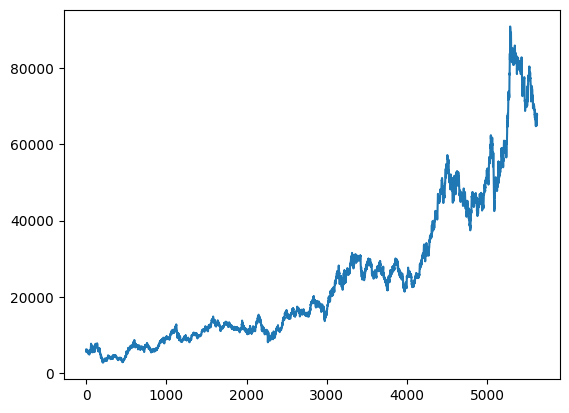

In [5]:
plt.plot(df.Close)

In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
5616    72070.0
5617    71973.0
5618    71868.0
5619    71777.0
5620    71675.0
Name: Close, Length: 5621, dtype: float64

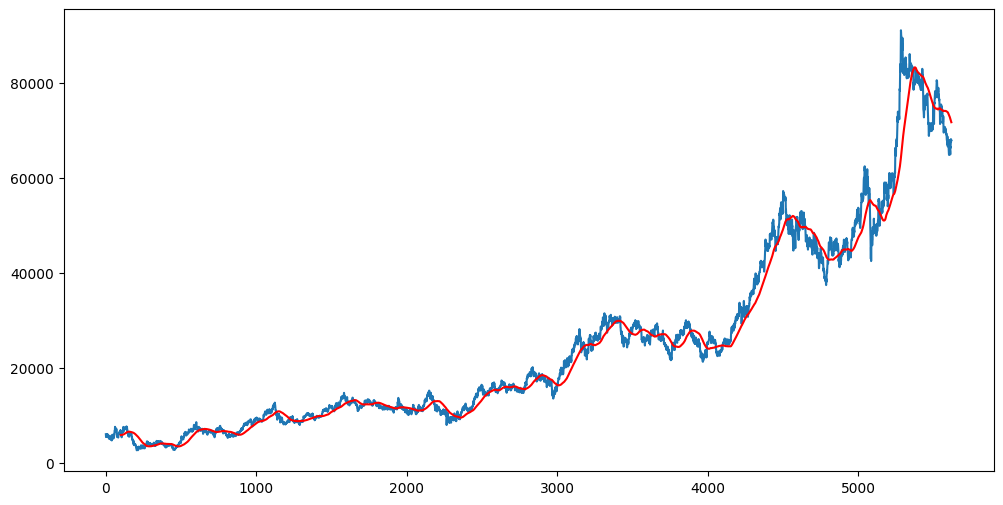

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
5616    73318.5
5617    73266.5
5618    73205.5
5619    73149.0
5620    73094.5
Name: Close, Length: 5621, dtype: float64

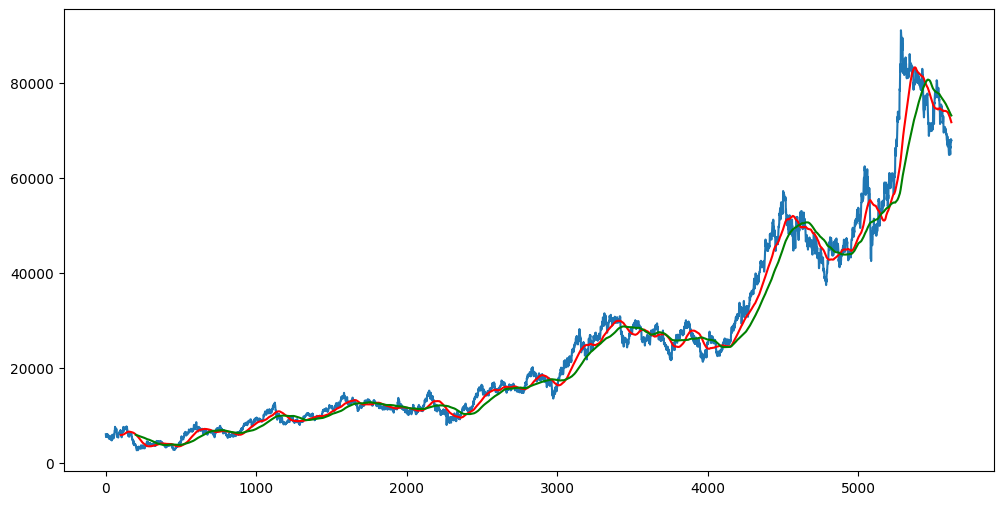

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [10]:
#Splitting Data into Training & Testing

train = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
test = pd.DataFrame(df['Close'][int(len(df)*0.7): int(len(df))])

In [11]:
test.shape

(1687, 1)

In [12]:
train.shape

(3934, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [16]:
train_arr = scaler.fit_transform(train)
train_arr

array([[0.11740188],
       [0.09899271],
       [0.10038208],
       ...,
       [0.75963876],
       [0.76658562],
       [0.76589093]])

In [35]:
x_train = []
y_train = []

for i in range(100, train.shape[0]):
    x_train.append(train_arr[i-100:i])
    y_train.append(train_arr[i])

x_train = np.array(x_train)
y_train = np.array(x_train)
print(x_train.shape, y_train.shape)

(3834, 100, 1) (3834, 100, 1)


In [30]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units = 50, activation ='relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation ='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation ='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [36]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
120/120 [==============================] - 39s 205ms/step - loss: 0.0263
Epoch 2/50
120/120 [==============================] - 15s 129ms/step - loss: 0.0085
Epoch 3/50
120/120 [==============================] - 16s 135ms/step - loss: 0.0071
Epoch 4/50
120/120 [==============================] - 16s 129ms/step - loss: 0.0076
Epoch 5/50
120/120 [==============================] - 15s 126ms/step - loss: 0.0068
Epoch 6/50
120/120 [==============================] - 15s 126ms/step - loss: 0.0056
Epoch 7/50
120/120 [==============================] - 15s 127ms/step - loss: 0.0057
Epoch 8/50
120/120 [==============================] - 15s 128ms/step - loss: 0.0055
Epoch 9/50
120/120 [==============================] - 15s 127ms/step - loss: 0.0048
Epoch 10/50
120/120 [==============================] - 15s 128ms/step - loss: 0.0049
Epoch 11/50
120/120 [==============================] - 15s 121ms/step - loss: 0.0054
Epoch 12/50
120/120 [==============================] - 14s 120ms/step - lo

In [37]:
model.save('Stock.h5')

C:\Users\Hanon Systems\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
model.save('Stock.keras')

In [39]:
past100 = train.tail(100)

In [40]:
final_df = past100.append(test, ignore_index = True)

C:\Users\Hanon Systems\AppData\Local\Temp\ipykernel_14260\734170862.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past100.append(test, ignore_index = True)


In [41]:
final_df

Close
0     27100.0
1     26880.0
2     27220.0
3     27480.0
4     27540.0
...       ...
1782  67600.0
1783  68100.0
1784  67500.0
1785  68000.0
1786  67900.0

[1787 rows x 1 columns]

In [43]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08268734],
       [0.07952914],
       [0.08440999],
       ...,
       [0.66264714],
       [0.66982486],
       [0.66838932]])

In [45]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [46]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [47]:
y_predicted = model.predict(x_test)

53/53 [==============================] - 3s 40ms/step


In [48]:
ss = scaler.scale_

In [49]:
scale_factor = 1/ss
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

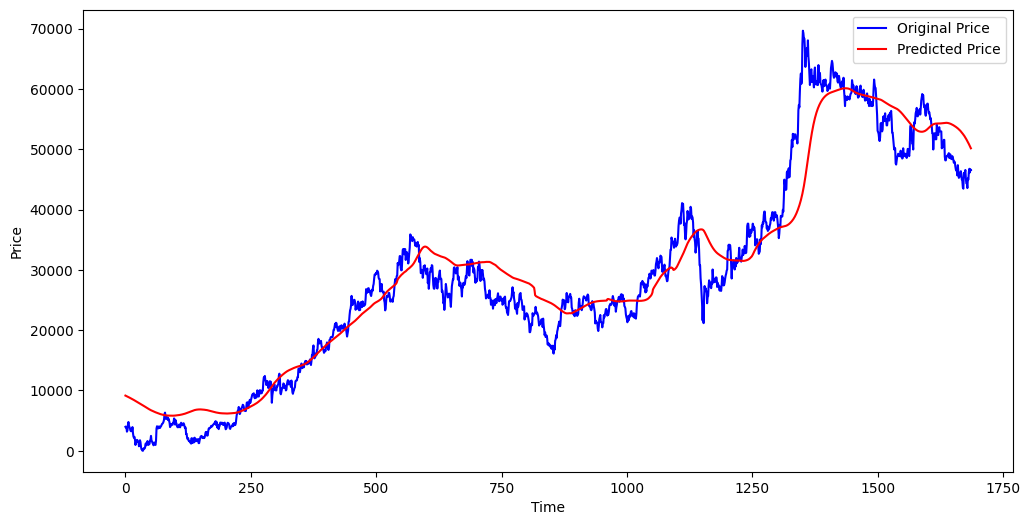

In [50]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show